
## Pemahaman Data ( data understanding)





## Data cleaning

- dalam kode ini berfungsi untuk membersihkan data mentah.

- Menangani missing values.

- Menstabilkan data numerik dari outlier.

- Menyediakan visualisasi sebagai verifikasi sebelum masuk ke tahap modeling (seperti klasifikasi dengan KNN, Decision Tree, dsb).


Missing values after imputation:


,0
ID,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0



Descriptive statistics after cleaning:


,Cholesterol,Tryglicerides,Copper,Cholesterol,Alk_Phos,SGOT,Tryglicerides,Copper,Platelets
count,418.000000,418.000000,418.000000,418.000000,312.000000,312.000000,418.000000,418.000000,407.000000
mean,347.441268,118.241627,90.272249,347.441268,1970.945179,121.922737,118.241627,90.272249,256.443243
std,173.660545,47.362672,68.861923,173.660545,2079.734777,53.338301,47.362672,68.861923,95.781504
min,153.890000,49.170000,11.000000,153.890000,381.070000,43.400000,49.170000,11.000000,79.060000
25%,273.000000,95.000000,51.250000,273.000000,871.500000,80.600000,95.000000,51.250000,188.500000
50%,309.500000,108.000000,73.000000,309.500000,1259.000000,114.700000,108.000000,73.000000,251.000000
75%,347.750000,127.750000,100.750000,347.750000,1980.000000,151.900000,127.750000,100.750000,318.000000
max,1325.800000,318.830000,406.560000,1325.800000,11290.104000,297.923500,318.830000,406.560000,516.820000


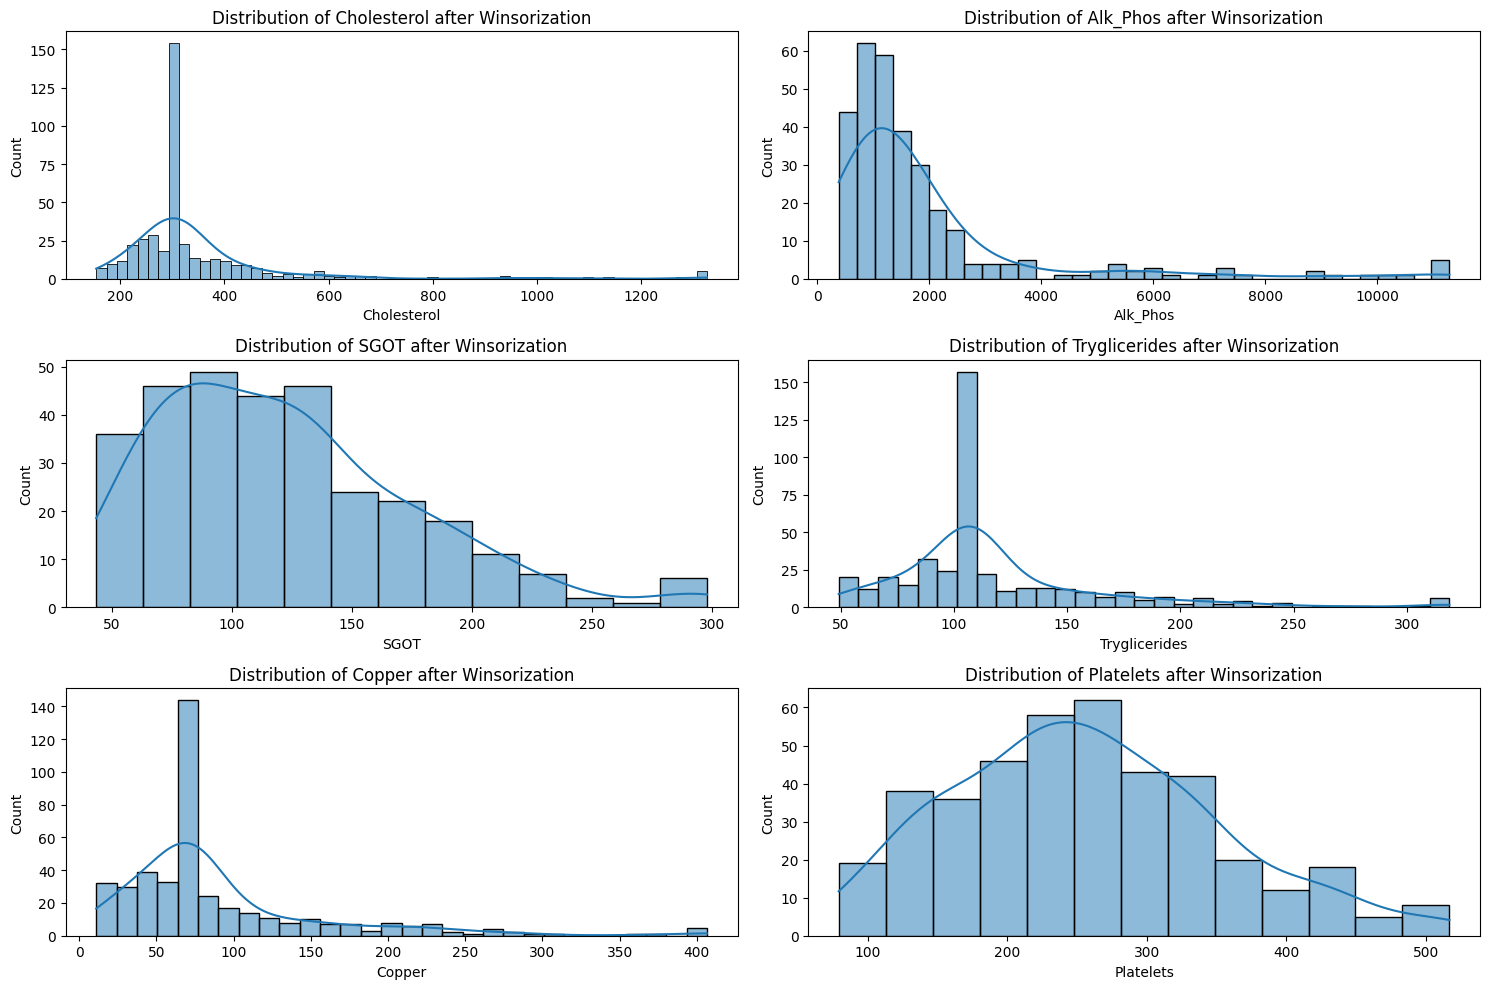

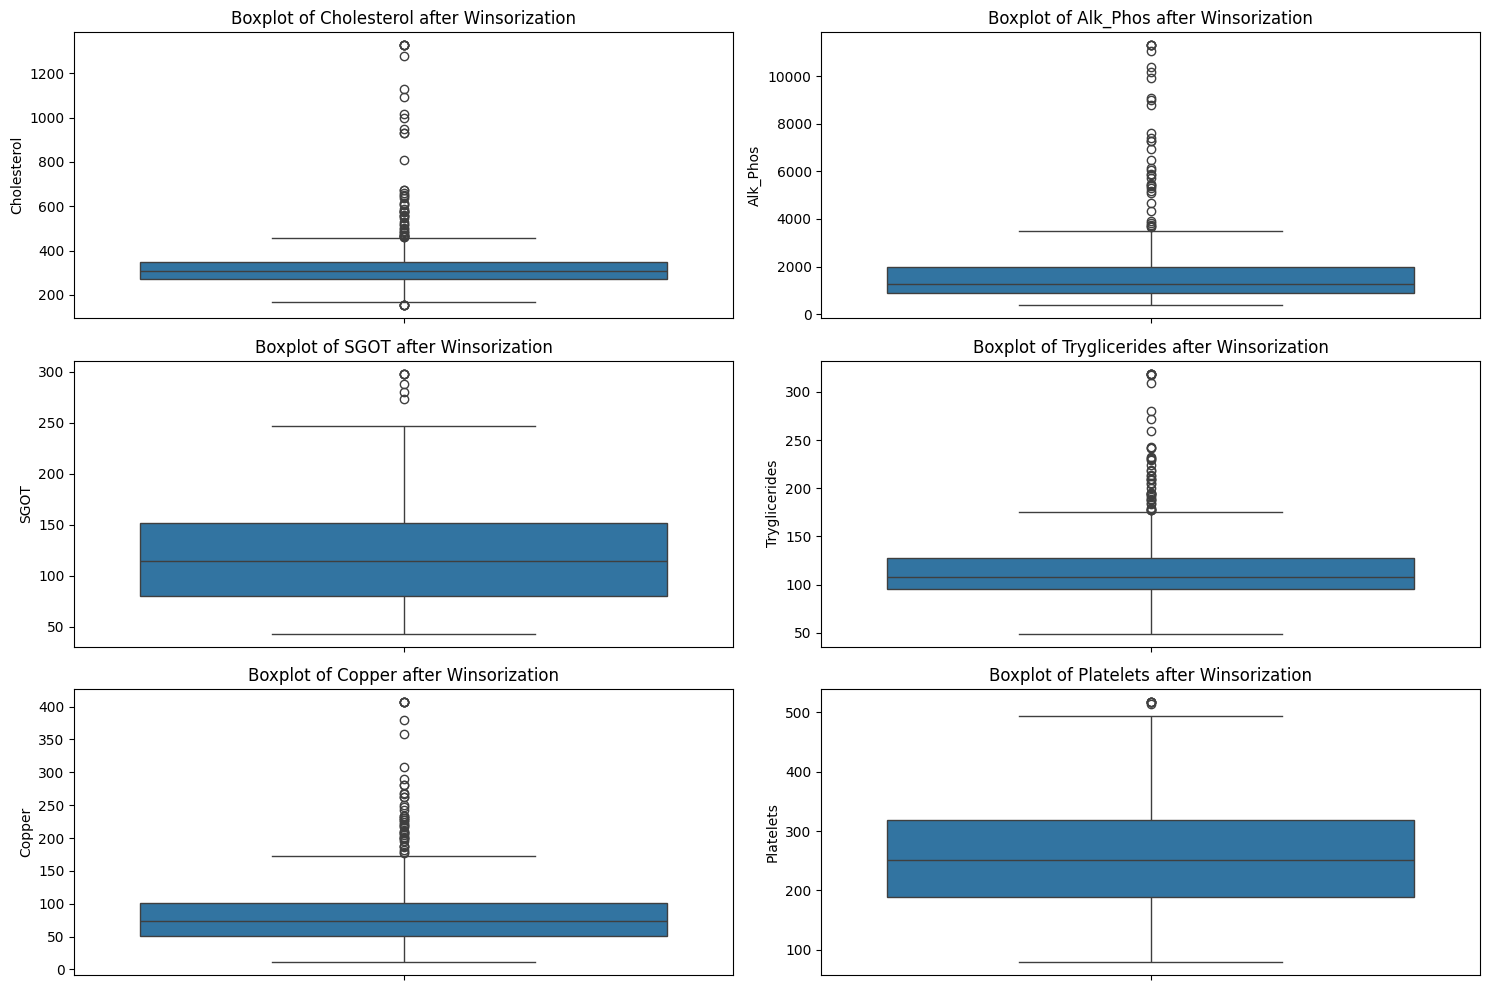

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file langsung dari path lokal di Colab (pastikan file sudah diunggah lewat file explorer)
df_cirrhosis = pd.read_csv('/content/cirrhosis.csv')  # Ubah nama jika beda

# Missing Value Imputation
numerical_cols = ['Cholesterol', 'Tryglicerides', 'Copper']
for col in numerical_cols:
    df_cirrhosis[col] = df_cirrhosis[col].fillna(df_cirrhosis[col].median())

categorical_cols = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
for col in categorical_cols:
    df_cirrhosis[col] = df_cirrhosis[col].fillna(df_cirrhosis[col].mode()[0])

# Outlier Handling (Winsorization)
winsorize_cols = ['Cholesterol', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Copper', 'Platelets']
for col in winsorize_cols:
    lower = df_cirrhosis[col].quantile(0.01)
    upper = df_cirrhosis[col].quantile(0.99)
    df_cirrhosis[col] = np.clip(df_cirrhosis[col], lower, upper)

# Verification
print("Missing values after imputation:")
display(df_cirrhosis.isnull().sum())

print("\nDescriptive statistics after cleaning:")
display(df_cirrhosis[numerical_cols + winsorize_cols].describe())

# Visual inspection of distributions after winsorization
plt.figure(figsize=(15, 10))
for i, col in enumerate(winsorize_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_cirrhosis[col], kde=True)
    plt.title(f'Distribution of {col} after Winsorization')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(winsorize_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df_cirrhosis[col])
    plt.title(f'Boxplot of {col} after Winsorization')
plt.tight_layout()
plt.show()


## Data preparation

code ini adalah bagian penting dalam data preprocessing yang bertujuan

Mengubah data menjadi format numerik (machine-readable),

Menyamakan skala antar fitur,

Memisahkan fitur dan target untuk proses training model machine learning

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. One-Hot Encode Categorical Features
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
# Use df_cirrhosis instead of df_cleaned
df_encoded = pd.get_dummies(df_cirrhosis, columns=categorical_cols, drop_first=True)

# 2. Scale Numerical Features
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 3. Separate Target Variable
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status'].replace({'C': 0, 'D': 1}) # Convert 'Status' to numerical labels

display(X.head())
display(y.head())

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,1,-1.375612,0.768941,2.562152,-0.498356,-2.114296,0.955630,-0.121819,0.300966,1.136397,...,False,False,True,True,True,False,True,False,False,True
1,2,2.340341,0.546706,-0.481759,-0.261981,1.513818,-0.527370,2.612145,-0.157790,-0.639277,...,False,False,False,True,True,False,False,False,True,False
2,3,-0.820938,1.852567,-0.413611,-0.988404,-0.041088,1.740748,-0.700706,-0.484909,-1.336863,...,False,True,False,False,False,True,False,False,False,True
3,4,0.006542,0.383244,-0.322748,-0.596366,-2.255651,-0.381978,1.999064,-1.150978,-0.554721,...,False,False,False,True,True,True,False,False,False,True
4,5,-0.375023,-1.210972,0.040704,-0.394582,0.076708,0.766620,-0.626057,-0.164738,-0.977501,...,True,False,False,True,True,False,False,False,True,False


,Status
0,1
1,0
2,1
3,1
4,CL


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert 'Status' to numerical labels *before* one-hot encoding
status_mapping = {'C': 0, 'D': 1, 'CL': 2}
# Replace df_cleaned with df_cirrhosis
df_cirrhosis['Status'] = df_cirrhosis['Status'].map(status_mapping)

# 1. One-Hot Encode Categorical Features
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
df_encoded = pd.get_dummies(df_cirrhosis, columns=categorical_cols, drop_first=True)

# 2. Scale Numerical Features
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 3. Separate Target Variable
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

display(X.head())
display(y.head())

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,1,-1.375612,0.768941,2.562152,-0.468656,-2.114296,0.682669,-0.123847,0.271931,0.727290,...,False,False,True,True,True,False,True,False,False,True
1,2,2.340341,0.546706,-0.481759,-0.291577,1.513818,-0.510652,2.532642,-0.159629,-0.564361,...,False,False,False,True,True,False,False,False,True,False
2,3,-0.820938,1.852567,-0.413611,-0.835769,-0.041088,1.314427,-0.686329,-0.467356,-1.071796,...,False,True,False,False,False,True,False,False,False,True
3,4,0.006542,0.383244,-0.322748,-0.542078,-2.255651,-0.393660,1.936935,-1.093939,-0.502854,...,False,False,False,True,True,True,False,False,False,True
4,5,-0.375023,-1.210972,0.040704,-0.390914,0.076708,0.530579,-0.613796,-0.166165,-0.810390,...,True,False,False,True,True,False,False,False,True,False


,Status
0,1
1,0
2,1
3,1
4,2


## Data loading

Kode ini sangat berguna dalam tahap awal analisis data:

Mengecek apakah data berhasil dibaca.

Menampilkan isi dan tipe data.

Menghindari program berhenti tiba-tiba karena kesalahan file atau format.

In [24]:
import pandas as pd

try:
    df_cirrhosis = pd.read_csv('cirrhosis.csv')
    display(df_cirrhosis.head())
    display(df_cirrhosis.dtypes)
except FileNotFoundError:
    print("Error: 'cirrhosis.csv' not found. Please ensure the file is in the correct location.")
except Exception as e:
    print(f"An error occurred: {e}")

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


,0
ID,int64
N_Days,int64
Status,object
Drug,object
Age,int64
Sex,object
Ascites,object
Hepatomegaly,object
Spiders,object
Edema,object


## Data exploration



,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000
mean,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731
std,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000
min,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000
50%,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000
75%,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000
max,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


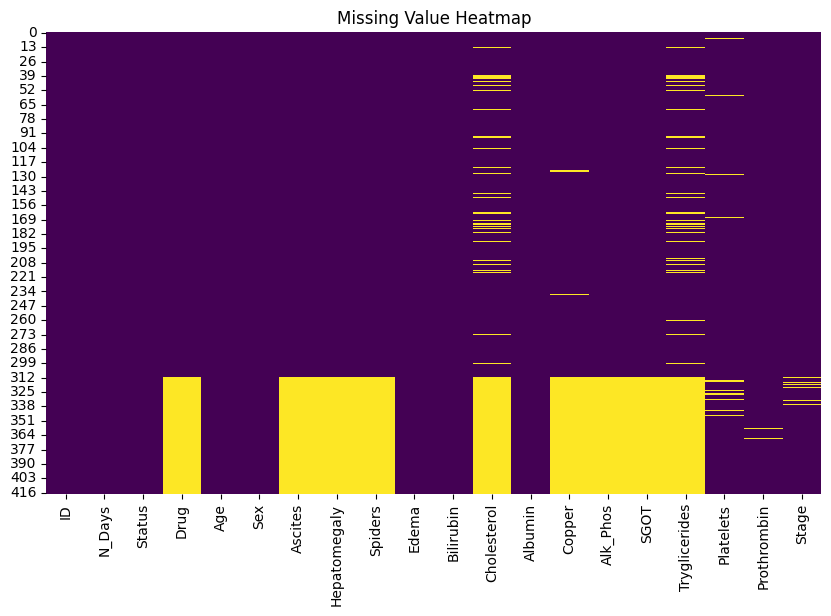

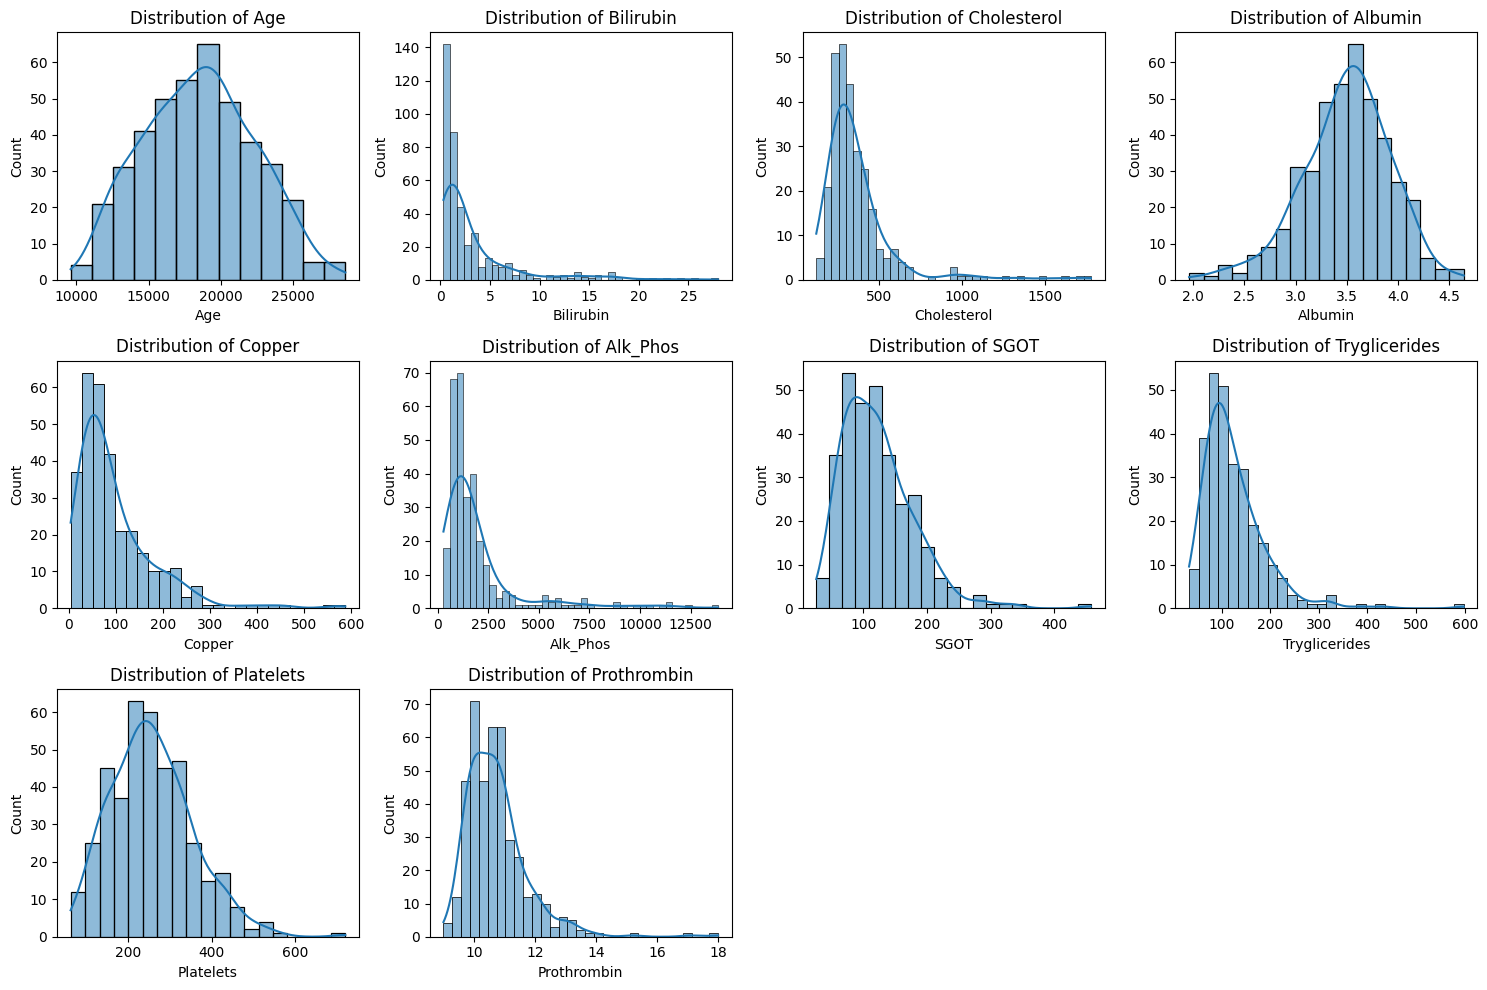

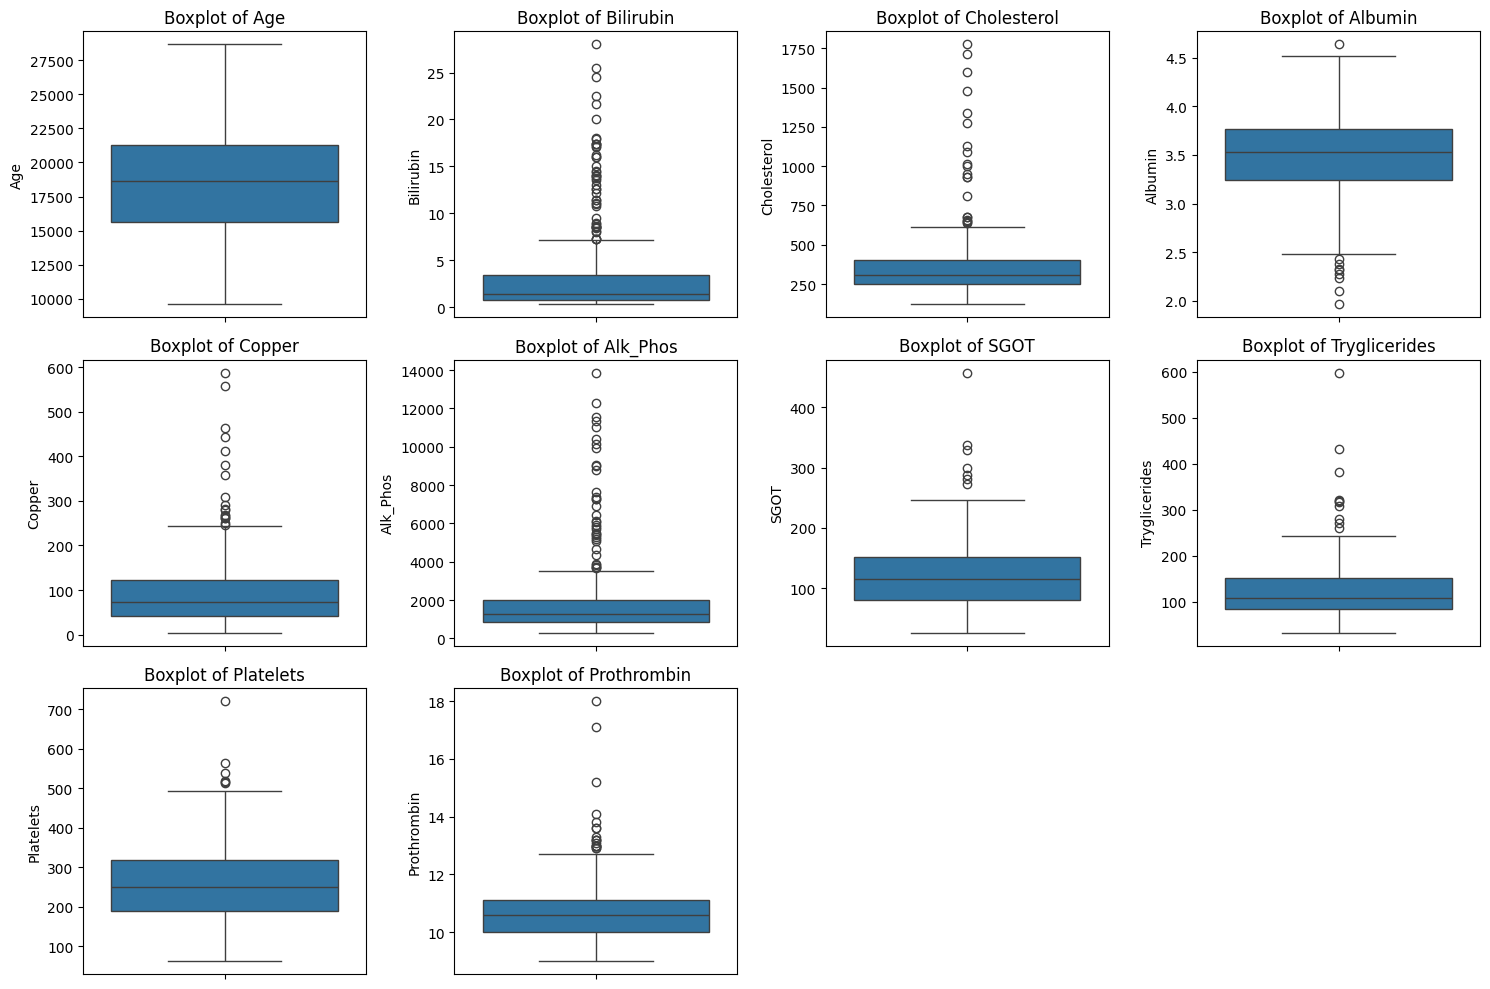

,proportion
Status,
C,0.555024
D,0.385167
CL,0.059809


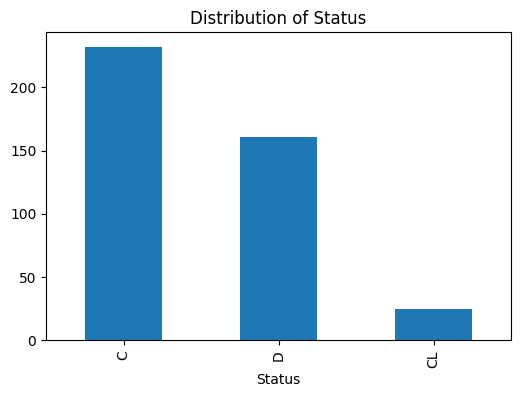

,proportion
Drug,
D-penicillamine,0.50641
Placebo,0.49359


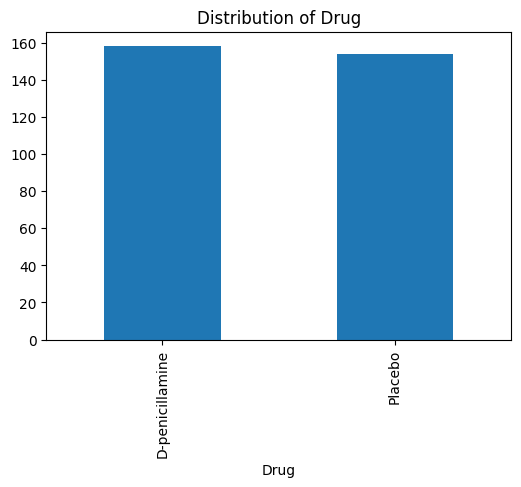

,proportion
Sex,
F,0.894737
M,0.105263


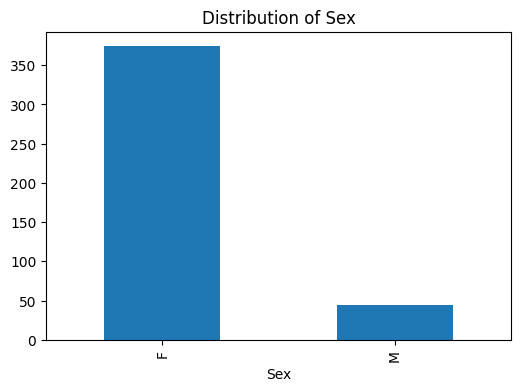

,proportion
Ascites,
N,0.923077
Y,0.076923


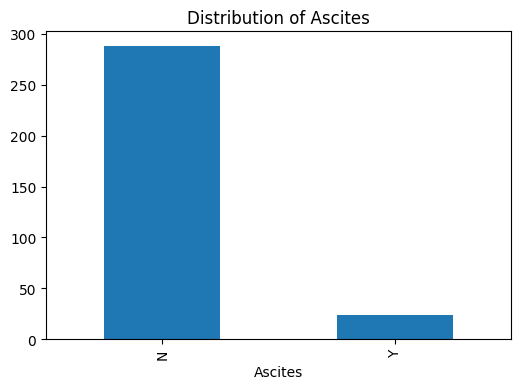

,proportion
Hepatomegaly,
Y,0.512821
N,0.487179


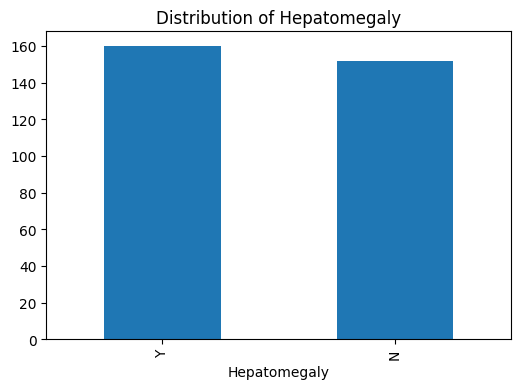

,proportion
Spiders,
N,0.711538
Y,0.288462


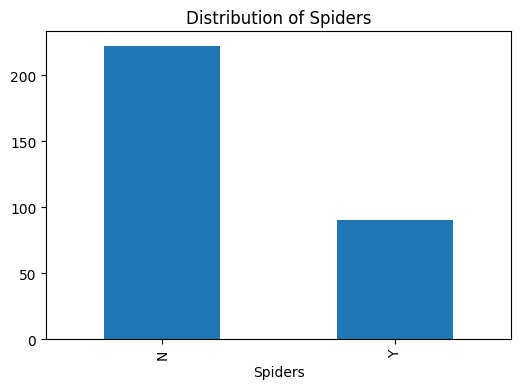

,proportion
Edema,
N,0.846890
S,0.105263
Y,0.047847


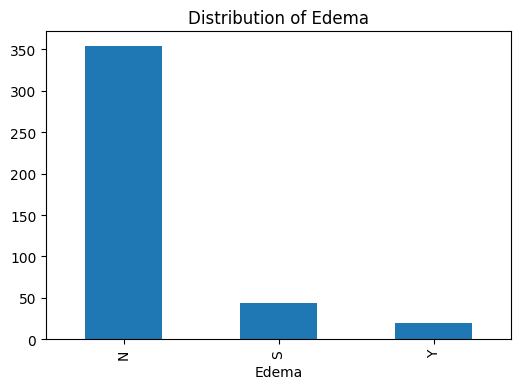

,proportion
Stage,
3.0,0.376214
4.0,0.349515
2.0,0.223301
1.0,0.050971


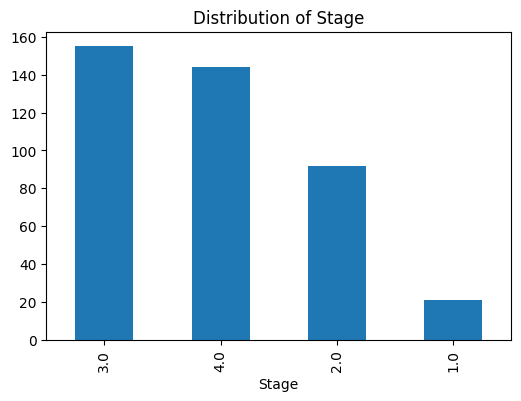

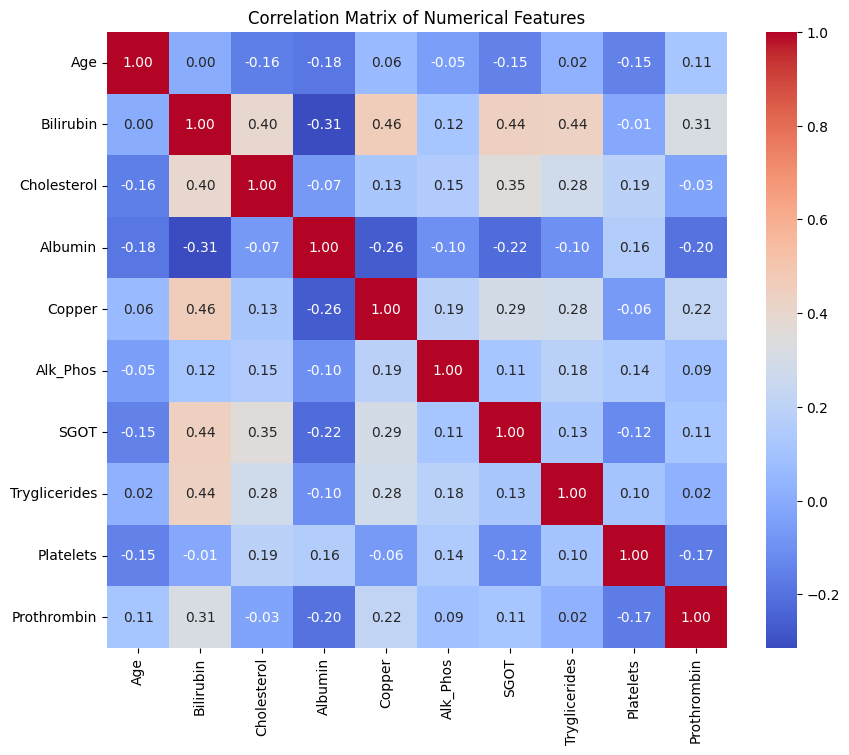

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
numerical_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
display(df_cirrhosis[numerical_features].describe())

# Missing Value Analysis
missing_values = df_cirrhosis.isnull().sum()
display(missing_values)
plt.figure(figsize=(10, 6))
sns.heatmap(df_cirrhosis.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# Data Distribution Visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_cirrhosis[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df_cirrhosis[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Categorical Variable Exploration
categorical_features = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
for col in categorical_features:
    display(df_cirrhosis[col].value_counts(normalize=True))
    plt.figure(figsize=(6, 4))
    df_cirrhosis[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation Analysis
correlation_matrix = df_cirrhosis[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Summarize Findings (Textual Summary -  Replace with your actual observations)

## Data splitting




In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model evaluation




Accuracy : 0.7381
Precision: 0.6988
Recall   : 0.7381
F1-score : 0.7123


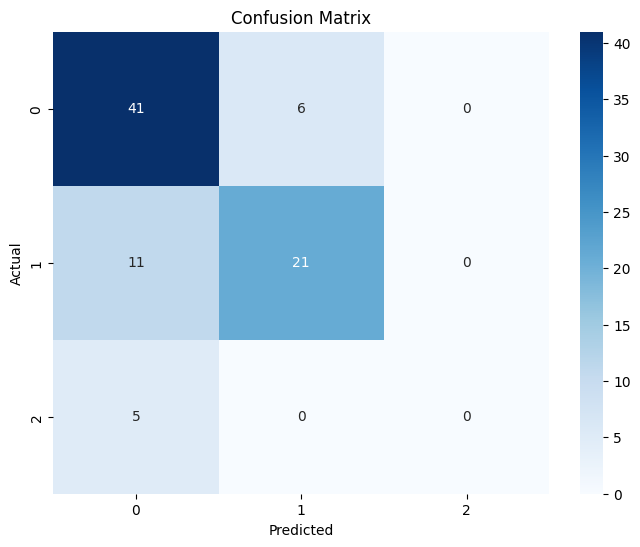

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Encode target label
label_encoder = LabelEncoder()
df_cirrhosis['Status_encoded'] = label_encoder.fit_transform(df_cirrhosis['Status'])

# 2. Fitur dan target
X = df_cirrhosis.drop(columns=['ID', 'Status', 'Status_encoded'])
y = df_cirrhosis['Status_encoded']

# 3. Encode fitur kategori
X = pd.get_dummies(X, drop_first=True)

# 4. Tangani missing values (imputasi ulang untuk jaga-jaga)
X = X.fillna(X.median(numeric_only=True))

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Inisialisasi dan latih model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# 7. Prediksi
y_pred = knn_classifier.predict(X_test)

# 8. Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# 9. Cetak hasil
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# 10. Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model optimization



Best hyperparameter: {'n_neighbors': 23}
Best score: 0.6884667571234735
Accuracy: 0.7143
Precision: 0.6708
Recall: 0.7143
F1-score: 0.6902


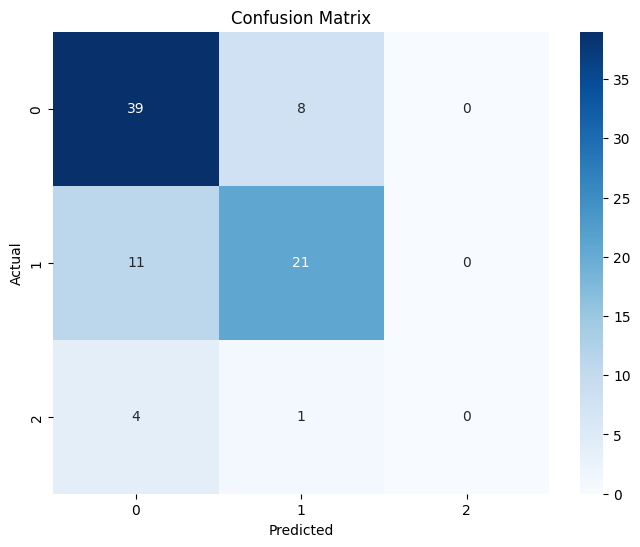

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameter value
print("Best hyperparameter:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

# Train a new KNN classifier with the best hyperparameter
best_knn = grid_search.best_estimator_

# 8. Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()